In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x = x_test

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

9


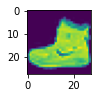

0


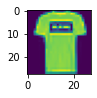

0


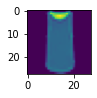

3


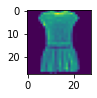

0


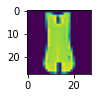

2


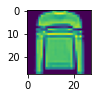

7


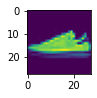

2


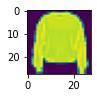

5


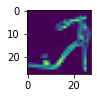

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [ ]:
x_train = x_train.astype('float32')/255.0 #chia dữ liệu về dạng 0:1 
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
469/469 [==============================] - 17s 14ms/step - loss: 0.6447 - accuracy: 0.7709 - val_loss: 0.4020 - val_accuracy: 0.8486
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.3338 - accuracy: 0.8789 - val_loss: 0.3155 - val_accuracy: 0.8849
Epoch 3/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2750 - accuracy: 0.8992 - val_loss: 0.2736 - val_accuracy: 0.8984
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2454 - accuracy: 0.9095 - val_loss: 0.2595 - val_accuracy: 0.9021
Epoch 5/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2140 - accuracy: 0.9189 - val_loss: 0.2569 - val_accuracy: 0.9067
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1944 - accuracy: 0.9283 - val_loss: 0.2607 - val_accuracy: 0.9027
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1728 - accuracy: 0.9360 - val_loss: 0.2567 - val_accuracy: 0.908

In [ ]:
#from keras.models import load_model
#model_cifar10 = load_model('CNN_cifar10.h5')
model.save('CNN_Fashion_Mnist.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.9118
Test loss=  0.5931576490402222
Test accuracy=  0.9118000268936157


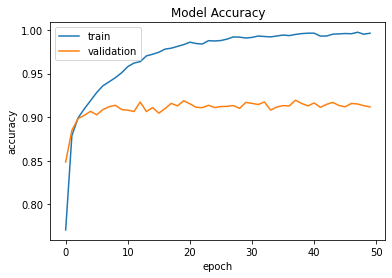

In [ ]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

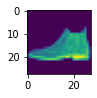

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


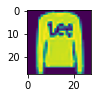

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


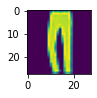

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


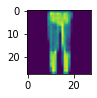

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


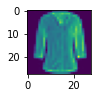

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


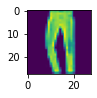

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


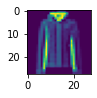

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


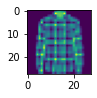

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


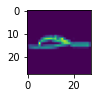

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import numpy as np

y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))